In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
submission_df = pd.read_csv('.\submission_complete.csv')
submission_df.head()

,class_name,anonymous_account,challenge_title,problem_title,problem_label,submission_id,submission_submit_time,submission_code_length,submission_result_verdict,submission_result_score,submission_result_time,submission_result_memory
0,PBC 110-2,a42fc3dd,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687662,2022-02-15 12:18:32.977,145,ACCEPTED,20,487,3148
1,PBC 110-2,e289ca52,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687663,2022-02-15 12:34:44.940,193,ACCEPTED,20,508,3056
2,PBC 110-2,78f382f0,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687664,2022-02-15 12:42:07.069,191,ACCEPTED,20,490,3056
3,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687665,2022-02-15 12:42:57.064,156,WRONG ANSWER,0,497,2928
4,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687666,2022-02-15 12:47:00.423,156,WRONG ANSWER,0,496,2928


In [101]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18085 entries, 0 to 18084
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class_name                 18085 non-null  object
 1   anonymous_account          18085 non-null  object
 2   challenge_title            18085 non-null  object
 3   problem_title              18085 non-null  object
 4   problem_label              18085 non-null  object
 5   submission_id              18085 non-null  int64 
 6   submission_submit_time     18085 non-null  object
 7   submission_code_length     18085 non-null  int64 
 8   submission_result_verdict  18085 non-null  object
 9   submission_result_score    18085 non-null  int64 
 10  submission_result_time     18085 non-null  int64 
 11  submission_result_memory   18085 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.7+ MB


# 我的繳交紀錄

In [51]:
my_df = hw_df[submission_df.anonymous_account == '36a93112']
my_group_ac = my_df.groupby(['challenge_title', 'problem_label'])['submission_result_verdict'].value_counts().unstack()

C:\Users\Yicheng\AppData\Local\Temp/ipykernel_43936/3671301593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  my_df = hw_df[submission_df.anonymous_account == '36a93112']


In [73]:
my_group_ac['total_times'] = my_group_ac[['ACCEPTED', 'RUNTIME ERROR', 'TIME LIMIT EXCEED', 'WRONG ANSWER']].sum(axis=1).values
my_group_ac['AC_rate'] = my_group_ac['ACCEPTED'] / my_group_ac['total_times']
my_group_ac = my_group_ac.reset_index()

In [75]:
my_group_ac.head()

In [97]:
my_group_ac['question'] = my_group_ac.challenge_title + '-' +  my_group_ac.problem_label

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

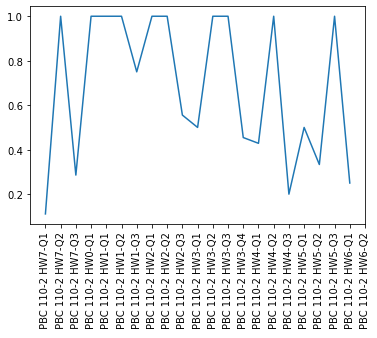

In [100]:
plt.plot(my_group_ac['question'].values, my_group_ac['AC_rate'].values)
plt.xticks(rotation= 90)

In [24]:
# 修課人數
submission_df.anonymous_account.nunique()

176

In [29]:
submission_df.shape

(18085, 12)

# 篩選出只有作業的row

In [31]:
hw_df = submission_df[submission_df['problem_title'].str.contains('HW')]
hw_df.shape

(15577, 12)

In [192]:
hw_df

,class_name,anonymous_account,challenge_title,problem_title,problem_label,submission_id,submission_submit_time,submission_code_length,submission_result_verdict,submission_result_score,submission_result_time,submission_result_memory
0,PBC 110-2,a42fc3dd,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687662,2022-02-15 12:18:32.977,145,ACCEPTED,20,487,3148
1,PBC 110-2,e289ca52,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687663,2022-02-15 12:34:44.940,193,ACCEPTED,20,508,3056
2,PBC 110-2,78f382f0,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687664,2022-02-15 12:42:07.069,191,ACCEPTED,20,490,3056
3,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687665,2022-02-15 12:42:57.064,156,WRONG ANSWER,0,497,2928
4,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687666,2022-02-15 12:47:00.423,156,WRONG ANSWER,0,496,2928
...,...,...,...,...,...,...,...,...,...,...,...,...
18074,PBC 110-2,fee6f0df,PBC 110-2 HW7,HW7(1) 讀檔，計算消費資訊,Q1,733927,2022-05-10 11:46:14.465,848,RUNTIME ERROR,0,452,3944
18075,PBC 110-2,a0a4f452,PBC 110-2 HW7,HW7（3）信貸預測,Q3,733929,2022-05-10 11:49:50.145,978,RUNTIME ERROR,0,627,3292
18076,PBC 110-2,b94504f2,PBC 110-2 HW7,HW7（3）信貸預測,Q3,733930,2022-05-10 11:51:35.926,1463,ACCEPTED,40,665,3312
18077,PBC 110-2,6e453482,PBC 110-2 HW7,HW7（3）信貸預測,Q3,733931,2022-05-10 11:55:43.867,2364,ACCEPTED,40,677,3312


# 算出平均AC比率

- 算出每一題的平均每人繳交次數

In [206]:
mean_submission = hw_df.groupby(['challenge_title', 'problem_label'])['submission_id'].count() / hw_df.groupby(['challenge_title', 'problem_label'])['anonymous_account'].nunique()

array([ 7.31538462,  2.12857143,  5.91729323,  4.13636364,  1.86549708,
        3.59763314,  6.09580838,  1.97590361,  3.81097561,  7.04666667,
        1.67924528,  2.00649351,  3.44444444,  6.55479452,  5.35664336,
        2.31205674,  7.66666667,  3.24137931,  4.47826087,  5.5037037 ,
        1.82394366,  9.27007299, 11.30508475])

In [249]:
group_ac = hw_df.groupby(['challenge_title', 'problem_label'])['submission_result_verdict'].value_counts().unstack()
# 算出單個題目的總提交次數
group_ac['total_times'] = group_ac[['ACCEPTED', 'RUNTIME ERROR', 'TIME LIMIT EXCEED', 'WRONG ANSWER']].sum(axis=1).values
# 算出AC率
group_ac['AC_rate'] = group_ac['ACCEPTED'] / group_ac['total_times']

# 併入平均提交次數
group_ac['mean_submission'] = mean_submission.values
group_ac = group_ac.reset_index()

# 併入每題得分率
group_ac['score_rate'] = score_rate.values

# 合併
group_ac['question'] = group_ac.challenge_title + '-' +  group_ac.problem_label
# 把PBC 110-2 去掉
group_ac.question = group_ac.question.str.replace('PBC 110-2 ', '')

# 只篩選出我們需要的欄位
group_ac = group_ac[['question', 'AC_rate', 'total_times', 'mean_submission', 'score_rate']]

# 重塑資料順序、並挑選欄位
cols = ['question', 'AC_rate', 'total_times', 'mean_submission', 'score_rate']
ac_df = pd.concat([group_ac[cols].iloc[3:], group_ac[cols].iloc[0:3]], axis=0)

In [250]:
ac_df

submission_result_verdict,question,AC_rate,total_times,mean_submission,score_rate
3,HW0-Q1,0.269972,726.0,4.136364,0.982955
4,HW1-Q1,0.764151,318.0,1.865497,0.994152
5,HW1-Q2,0.388797,607.0,3.597633,0.993491
6,HW1-Q3,0.349409,1016.0,6.095808,0.986527
7,HW2-Q1,0.656442,326.0,1.975904,0.993373
8,HW2-Q2,0.360129,622.0,3.810976,0.975000
9,HW2-Q3,0.302744,1057.0,7.046667,0.896667
10,HW3-Q1,0.691729,266.0,1.679245,0.987421
11,HW3-Q2,0.572816,309.0,2.006494,0.995455
12,HW3-Q3,0.342857,525.0,3.444444,0.971242


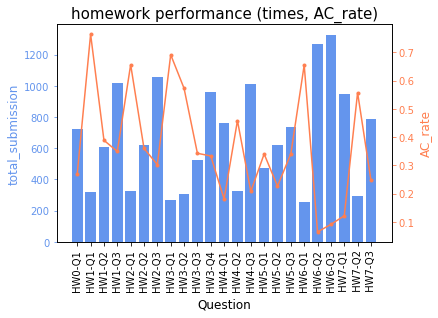

In [223]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Question', fontsize=12)
plt.xticks(rotation = 90)

ax1.bar(ac_df['question'], ac_df['total_times'], color='cornflowerblue')
ax1.set_ylabel('total_submission', color='cornflowerblue', fontsize=12)
ax1.tick_params('y', colors='cornflowerblue')

ax2 = ax1.twinx()

ax2.plot(ac_df['question'], ac_df['AC_rate'], '-', color = 'coral', marker='.')
ax2.set_ylabel('AC_rate',color='coral', fontsize=12)
ax2.tick_params('y', colors='coral')

plt.title('homework performance (times, AC_rate)', fontsize=15)
plt.show()

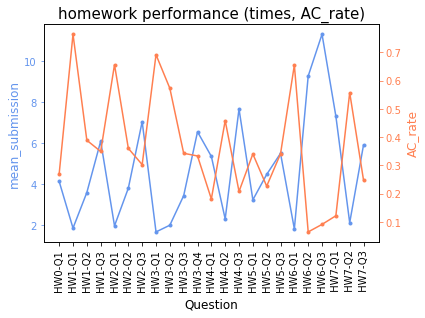

In [228]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Question', fontsize=12)
plt.xticks(rotation = 90)

ax1.plot(ac_df['question'], ac_df['mean_submission'], color='cornflowerblue', marker='.')
ax1.set_ylabel('mean_submission', color='cornflowerblue', fontsize=12)
ax1.tick_params('y', colors='cornflowerblue')

ax2 = ax1.twinx()

ax2.plot(ac_df['question'], ac_df['AC_rate'], '-', color = 'coral', marker='.')
ax2.set_ylabel('AC_rate',color='coral', fontsize=12)
ax2.tick_params('y', colors='coral')

plt.title('homework performance (times, AC_rate)', fontsize=15)
plt.show()

In [32]:
hw_df.groupby(['challenge_title', 'problem_label'])['submission_code_length'].mean()


challenge_title  problem_label
 PBC 110-2 HW7   Q1               1651.980021
                 Q2               1570.221477
                 Q3               2496.133418
PBC 110-2 HW0    Q1                193.810440
PBC 110-2 HW1    Q1                398.426332
                 Q2                690.463816
                 Q3               1104.036346
PBC 110-2 HW2    Q1                388.661585
                 Q2                511.017600
                 Q3               1766.158940
PBC 110-2 HW3    Q1                466.651685
                 Q2                702.708738
                 Q3               1631.624288
                 Q4               1818.667712
PBC 110-2 HW4    Q1               1264.694517
                 Q2               1223.355828
                 Q3               1320.418972
PBC 110-2 HW5    Q1                576.282979
                 Q2               1396.231392
                 Q3               2271.257066
PBC 110-2 HW6    Q1                638.694981
   

In [229]:
hw_df.head()

,class_name,anonymous_account,challenge_title,problem_title,problem_label,submission_id,submission_submit_time,submission_code_length,submission_result_verdict,submission_result_score,submission_result_time,submission_result_memory
0,PBC 110-2,a42fc3dd,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687662,2022-02-15 12:18:32.977,145,ACCEPTED,20,487,3148
1,PBC 110-2,e289ca52,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687663,2022-02-15 12:34:44.940,193,ACCEPTED,20,508,3056
2,PBC 110-2,78f382f0,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687664,2022-02-15 12:42:07.069,191,ACCEPTED,20,490,3056
3,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687665,2022-02-15 12:42:57.064,156,WRONG ANSWER,0,497,2928
4,PBC 110-2,2410aedf,PBC 110-2 HW0,HW0 (1) 商品總價計算與折價券發放,Q1,687666,2022-02-15 12:47:00.423,156,WRONG ANSWER,0,496,2928


# 算每題平均成績

In [245]:
mean_score = hw_df.groupby(['challenge_title', 'problem_label', 'anonymous_account'])['submission_result_score'].max().unstack().mean(axis=1)
max_score = [20, 20, 40, 20, 20, 20, 40, 20, 20, 40, 20, 20, 20, 20, 20, 30, 30, 20, 20, 40, 20, 30, 30]
score_rate = mean_score / max_score

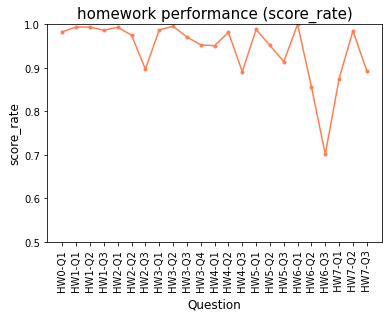

In [259]:
plt.plot(ac_df['question'], ac_df['score_rate'], '-', color = 'coral', marker='.')
plt.xticks(rotation = 90)
plt.title('homework performance (score_rate)', fontsize=15)
plt.xlabel('Question', fontsize=12)
plt.ylabel('score_rate', fontsize=12)
plt.ylim([0.5, 1])
plt.show()